In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [8]:
#load my data set
#data = pd.read_csv('my exel2')
data = pd.read_csv('my exel2', delimiter=',', encoding="utf-8-sig")

data.head(5)


,Ansa,Clingo,new_creation
0,3,6,3
1,3,1,1
2,8,4,1
3,1,10,0
4,3,8,3


In [9]:
#store business type as and attribute
data['business_type'] = 'artist'
#label business rating
def rating_label(data):
    
    if value in data <= 5:
            print ('low')
            
    else:
        value in data > 5
        
        print ('high')
        data['rating_label']= pd.Categorical(data['rating_label'], 
                                             categories=['low','high'])
        # re-shuffle records just to randomize data points
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
                             
data

,Ansa,Clingo,new_creation,business_type
0,7,3,0,artist
1,7,4,0,artist
2,4,9,7,artist
3,8,1,1,artist
4,3,8,3,artist
5,3,1,4,artist
6,2,7,1,artist
7,2,4,2,artist
8,3,3,5,artist
9,8,3,2,artist


In [10]:
#discriptive summarry statistics
subset_attributes =  ['Ansa', 'Clingo', 'new_creation']
rs = round (data[subset_attributes]. describe(), 2)
pd.concat([data], axis = 1, keys = ['data Statistics'])

data Statistics                                  
              Ansa Clingo new_creation business_type
0                7      3            0        artist
1                7      4            0        artist
2                4      9            7        artist
3                8      1            1        artist
4                3      8            3        artist
5                3      1            4        artist
6                2      7            1        artist
7                2      4            2        artist
8                3      3            5        artist
9                8      3            2        artist
10               6      8            5        artist
11               1      2            3        artist
12               4      2            3        artist
13               5      2            5        artist
14               5      9            2        artist
15               5      4            6        artist
16               4      6            5        artist
17               8      1            7        artist
18               8      9            3        artist
19               3      6            3        artist
20               1      8            7        artist
21               5      4            3        artist
22               6      3            0        artist
23               3      1            1        artist
24               5     10            0        artist
25               5      4            5        artist
26               8      4            1        artist
27               8      9            5        artist
28               5      8            4        artist
29               1     10            0        artist
30               3      2            3        artist
31               5      6            5        artist
32               1      7            1        artist
33               4      1            5        artist
34               5      4            4        artist
35               8      1            3        artist
36               6     10            6        artist
37               6      9            1        artist
38               7      6            5        artist
39               7      7            6        artist
40               3      2            3        artist

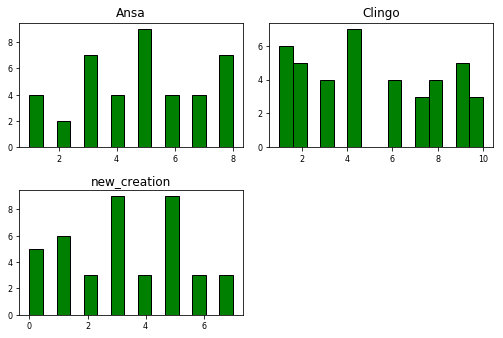

In [5]:
#univarate analysis(one dimension 1-D)
data.hist(bins=15, color = 'green', edgecolor = 'black', linewidth = 1.0,  
          xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout(rect = (0,0,1.2,1.2))

Text(0.5,0.98,'data Attributes correlation heatmap')

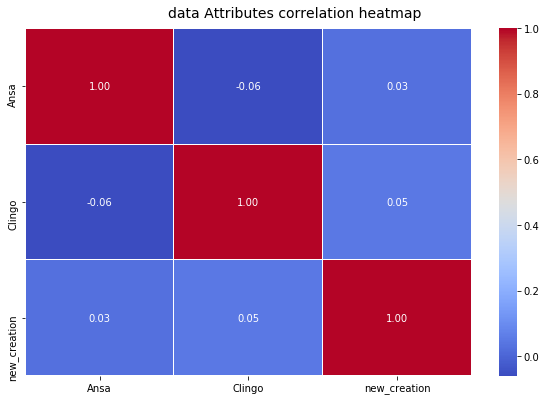

In [15]:
####2-D visualizing two dimentions
f, ax = plt.subplots(figsize = (10,6))
corr = data.corr()
hm = sns.heatmap(round(corr, 2), annot = True, ax=ax, cmap="coolwarm", fmt = ".2f", 
                linewidths=.05)
f.subplots_adjust(top = 0.93)
f.suptitle("data Attributes correlation heatmap", fontsize = 14)

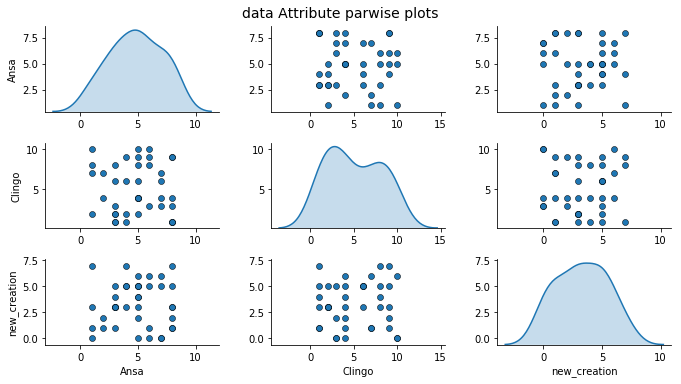

In [16]:
cols =  ['Ansa', 'Clingo', 'new_creation']
pp = sns.pairplot(data[cols], size = 1.8, aspect = 1.8,
                 plot_kws=dict(edgecolor="k", linewidth = 0.5),
                 diag_kind = "kde", diag_kws = dict(shade = True))

fig =  pp.fig
fig.subplots_adjust(top = 0.93, wspace = 0.3)
t = fig.suptitle('data Attribute parwise plots', fontsize = 14)

In [17]:
cols = ['Ansa', 'Clingo', 'new_creation']
subset_df = data[cols]
from sklearn.preprocessing import  StandardScaler
ss =  StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns = cols)
final_df =  pd.concat([scaled_df, data['business_type']], axis = 1)
final_df.head()

,Ansa,Clingo,new_creation,business_type
0,0.993313,-0.689396,-1.560720,artist
1,0.993313,-0.356864,-1.560720,artist
2,-0.379468,1.305797,1.757255,artist
3,1.450907,-1.354460,-1.086723,artist
4,-0.837062,0.973264,-0.138731,artist


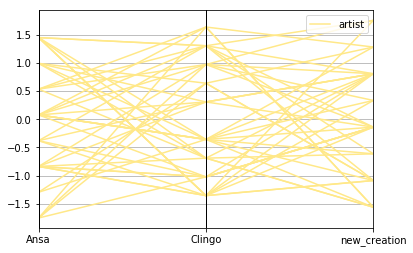

In [18]:
from pandas.plotting import parallel_coordinates
pc =  parallel_coordinates(final_df,  'business_type', color = ('#FFE888', 'FFE9999'))

Text(0.5,1.5,'data  Ansa - Clingo rating')

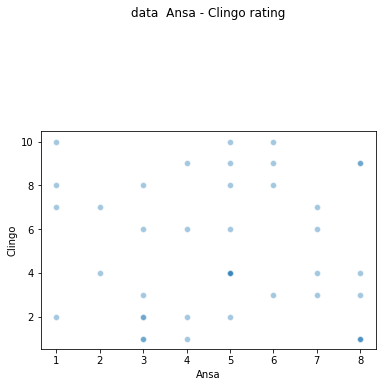

In [19]:
#### Tow Continues Numeric attributes
plt.scatter(data['Ansa'], data['Clingo'],
           alpha = 0.4, edgecolors = 'W')

plt.xlabel('Ansa')
plt.ylabel('Clingo')
plt.title('data  Ansa - Clingo rating', y = 1.5)

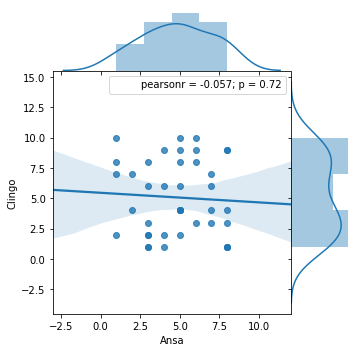

In [20]:
jp = sns.jointplot(x = 'Ansa', y = 'Clingo', data = data, 
                  kind = 'reg', space = 0, size = 5, ratio = 4)

Text(0,0.5,'Clingo')

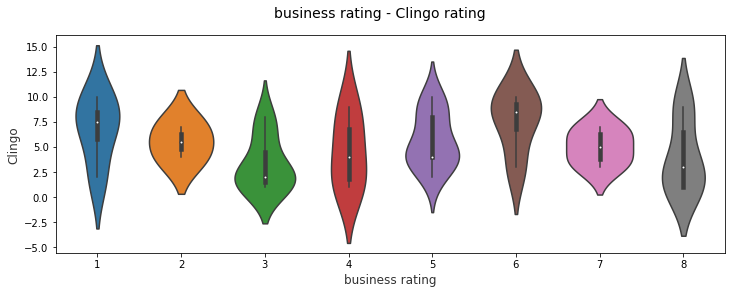

In [25]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('business rating - Clingo rating', fontsize=14)

sns.violinplot(x="Ansa", y="Clingo", data=data,  ax=ax)
ax.set_xlabel("business rating",size = 12,alpha=0.8)
ax.set_ylabel("Clingo",size = 12,alpha=0.8)

##visualizing three dimensions

Text(0,0.5,'Clingo')

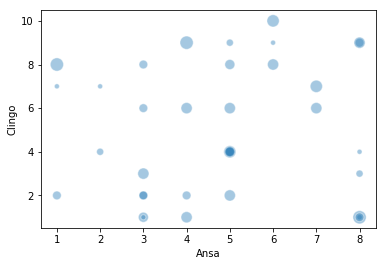

In [28]:
plt.scatter(data['Ansa'], data['Clingo'], s=data['new_creation']*25,
            alpha = 0.4, edgecolors = 'w')
            
plt.xlabel('Ansa')
plt.ylabel('Clingo')

Text(0.5,0,'new_creation')

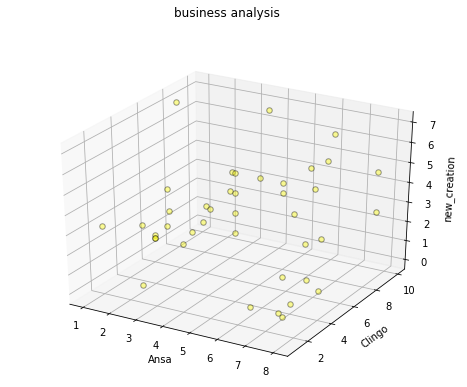

In [29]:
#VISUALIZING FOUR DIMENSIONS
fig = plt.figure(figsize = (8,6))
t =fig.suptitle('business analysis')
ax = fig.add_subplot(111, projection = '3d')

xs = list(data['Ansa'])
ys = list(data['Clingo'])
zs = list(data['new_creation'])
data_points = [(x,y,z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list (data['business_type'])]

for data, color in zip(data_points, colors):
    x,y,z = data
    ax.scatter(x,y,z, alpha =0.4, c=color, edgecolors = 'none', s=30)

ax.set_xlabel('Ansa')
ax.set_ylabel('Clingo')
ax.set_zlabel('new_creation')